<a href="https://colab.research.google.com/github/sterlinggutterman/Final-Project/blob/main/decision_trees_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_parquet('https://github.com/sterlinggutterman/Final-Project/raw/refs/heads/main/full_df%20(2).parquet')
df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages


In [9]:
df.shape

(2419144, 18)

In [10]:
X = df[['days_since_prior_order', 'order_hour_of_day']]
y = df['reordered']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7835889790339293
              precision    recall  f1-score   support

           0       1.00      0.05      0.10    165806
           1       0.78      1.00      0.88    559938

    accuracy                           0.78    725744
   macro avg       0.89      0.53      0.49    725744
weighted avg       0.83      0.78      0.70    725744



In [14]:
#feature importance

importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
print(importance.sort_values(by='Importance', ascending=False))

                  Feature  Importance
0  days_since_prior_order    0.985862
1       order_hour_of_day    0.014138


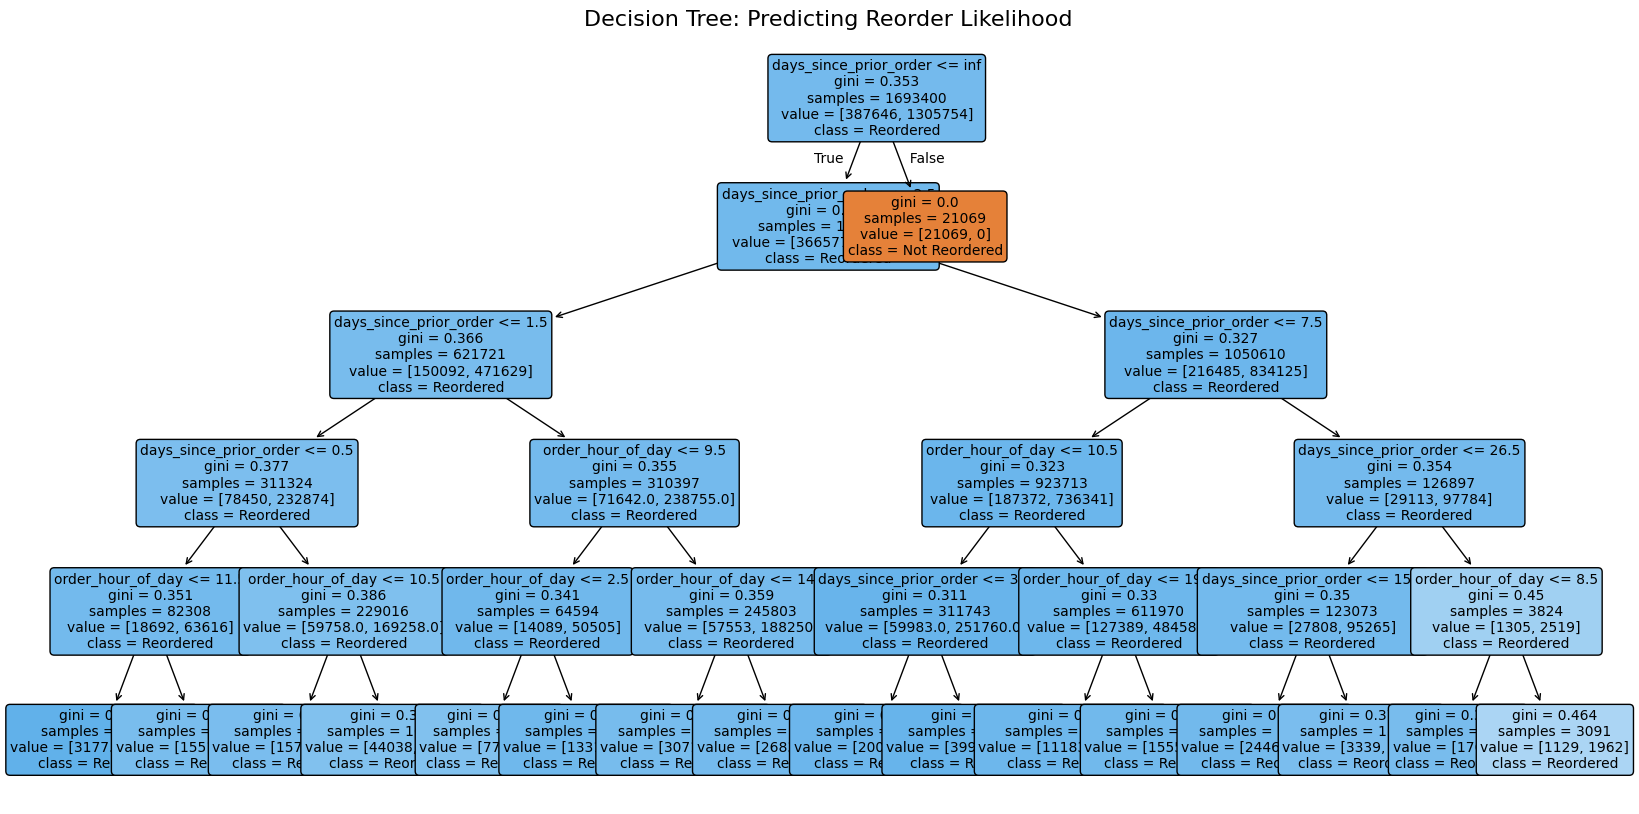

In [17]:
#visualizing splits

from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Not Reordered", "Reordered"],
    filled=True,
    rounded=True,
    fontsize=10,
)

plt.title("Decision Tree: Predicting Reorder Likelihood", fontsize=16)
plt.show()